# EV Curves

In [1]:
import matplotlib.pyplot as plt

In [4]:
from workflows.pyiron.build import bulk
from workflows.pyiron.evcurves import calculate_ev_curves, relax_structure
from pyiron_workflow import Workflow, as_function_node
from workflows.pyiron.kg import KnowledgeDict 

pair_style = "eam/alloy"
pair_coeff = "* * workflows/potentials/Fe_Ack.eam Fe"

kg = KnowledgeDict()

wf = Workflow('ev1')
wf.structure = bulk('Fe', cubic=True, kg=kg)
wf.relaxed_structure = relax_structure(wf.structure,
                                      pair_style, pair_coeff, kg=kg,)
wf.ev_curves = calculate_ev_curves(wf.relaxed_structure.outputs.final_structure, 
                                  pair_style, pair_coeff, kg=kg,
                                  vol_range=0.003,)
res = wf.run()
kg.to_yaml('single_evcurve.yaml')

{'relaxed_structure__ecoh': np.float64(-4.316000105825012),
 'relaxed_structure__vol': np.float64(11.776761637547356),
 'ev_curves__datadict': {'energy': array([-4.31544619, -4.31546885, -4.31549101, -4.31551268, -4.31553387,
         -4.31555458, -4.3155748 , -4.31559453, -4.31561378, -4.31563256,
         -4.31565085, -4.31566866, -4.31568599, -4.31570285, -4.31571923,
         -4.31573513, -4.31575057, -4.31576552, -4.31578001, -4.31579402,
         -4.31580757, -4.31582065, -4.31583326, -4.3158454 , -4.31585707,
         -4.31586829, -4.31587903, -4.31588932, -4.31589914, -4.31590851,
         -4.31591741, -4.31592586, -4.31593385, -4.31594138, -4.31594846,
         -4.31595508, -4.31596125, -4.31596697, -4.31597223, -4.31597705,
         -4.31598142, -4.31598534, -4.31598881, -4.31599184, -4.31599442,
         -4.31599656, -4.31599825, -4.31599951, -4.31600032, -4.31600069,
         -4.31600063, -4.31600012, -4.31599918, -4.31599781, -4.315996  ,
         -4.31599376, -4.31599108,

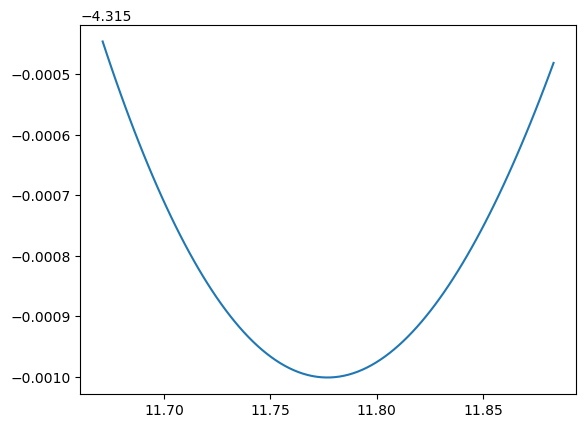

In [6]:
plt.plot(res['ev_curves__datadict']['volume'], res['ev_curves__datadict']['energy'])

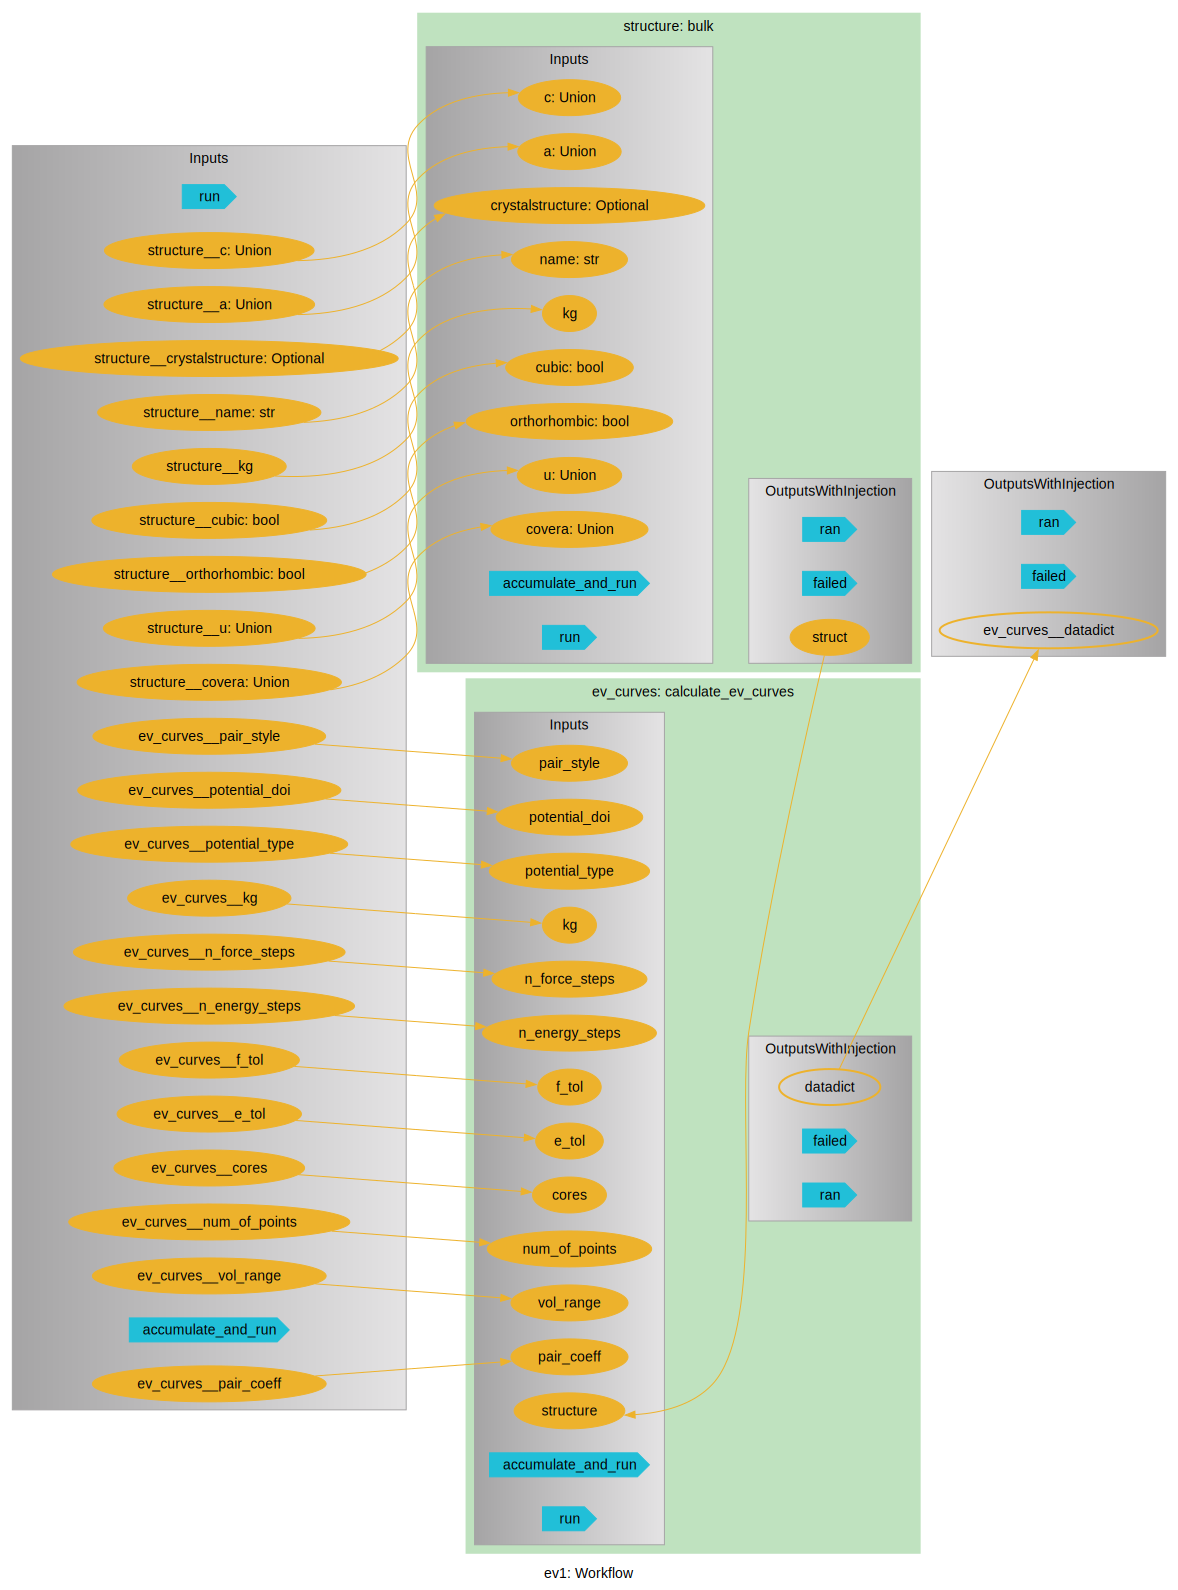

In [6]:
wf.draw(rankdir='LR', save=True)